### Author : Bhumit Bedse 
### ID : 19CP012
### Title : Model Deployment Using Flask

In [1]:
!pip install Flask

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline 

In [3]:
data = load_iris()

In [4]:
dir(data)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
data.data.shape

(150, 4)

In [6]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [7]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [8]:
df['target'] = data.target

In [9]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [10]:
data.target_names #setosa 0, 'versicolor' 1, 'virginica 2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [13]:
X = data.data
y = data.target

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [15]:
dt = DecisionTreeClassifier()

In [16]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [17]:
y_pred = dt.predict(X_test)

In [18]:
y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 2, 1])

In [19]:
accuracy_score(Y_test,y_pred)

0.9666666666666667

In [29]:
cm = confusion_matrix(Y_test,y_pred)

Text(0.5, 15.0, 'Predicted Data')

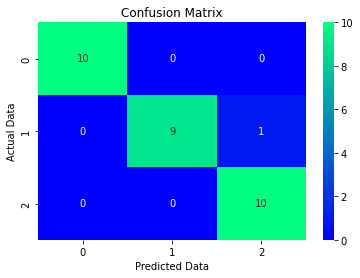

In [35]:
plt.title('Confusion Matrix')
sns.heatmap(cm,annot=True,cmap='winter')
plt.ylabel('Actual Data')
plt.xlabel('Predicted Data')

In [20]:
def score(sample):
  import numpy as np
  np_sample = np.array(sample)
  pred = dt.predict(np_sample.reshape(1, -1)).tolist()
  return ['setosa', 'versicolor', 'virginica'][pred[0]]

In [21]:
score(X_test[3])

'setosa'

In [22]:
import pickle
pickle.dump(dt, open("model.pkl","wb"))

In [ ]:
from flask import Flask, render_template, request
app = Flask(__name__,template_folder='E:/python/ml/')
@app.route("/")
def home():
    return render_template('home.html')
@app.route("/iris")
def iris():
    return render_template('iris.html')

@app.route('/predict',methods = ['POST', 'GET'])
def predict():
  if request.method == 'POST':
      sl = request.form['sl']
      sw = request.form['sw']
      pl = request.form['pl']
      pw = request.form['pw']
      sample = [int(sl),int(sw),int(pl),int(pw)]
      pred = score(sample)
      return render_template("predict.html", value=pred)
    

if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [10/Feb/2022 17:19:32] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Feb/2022 17:19:35] "GET /iris HTTP/1.1" 200 -
[2022-02-10 17:19:46,087] ERROR in app: Exception on /predict [POST]
Traceback (most recent call last):
  File "c:\users\bhumit\appdata\local\programs\python\python39\lib\site-packages\flask\app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\users\bhumit\appdata\local\programs\python\python39\lib\site-packages\flask\app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\users\bhumit\appdata\local\programs\python\python39\lib\site-packages\flask\app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\users\bhumit\appdata\local\programs\python\python39\lib\site-packages\flask\app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  Fil

In [26]:
X_test[10]

array([5.6, 3. , 4.1, 1.3])